*Member 1*

Name: Omar Aref 

ID: 46-5432

*Member 2*

Name: Hana Adel

ID: 46-0377

*Member 3*

Name: Sarah Halla

ID: 46-0431

*Member 4*

Name: Farida El Genedi  

ID: 46-2291

*Member 5*

Name: Shawky Haitham  

ID: 46-3502

# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

In [477]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [478]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
import math

from IPython.display import display

# 1 - Extraction

In [479]:
df  = pd.read_csv("2020_Accidents_UK.csv", low_memory=False);
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  object 
 8   accident_severity                            91199 non-null  object 
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [481]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,...,unknown (self reported),Daylight,NaN,unknown (self reported),None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,...,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004763


# 2- EDA

### Question 1: What are the most frequent locations (clusters) that have accidents ? we will use the latitude and longitude data found in the dataset provided.  


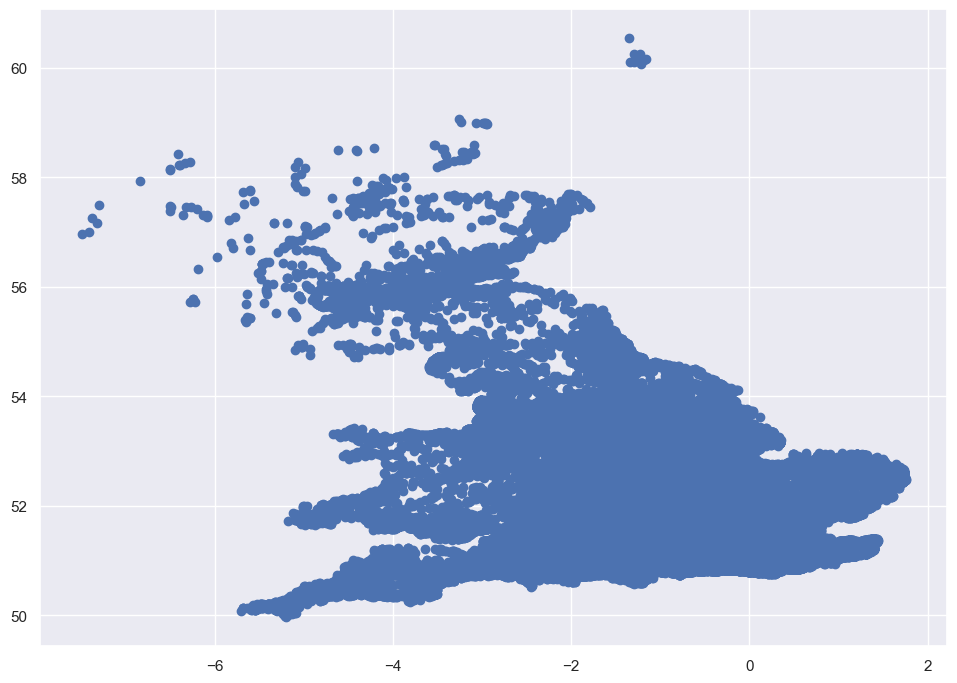

In [482]:
plt.plot(df['longitude'], df['latitude'], 'o', );


We can see that there are many points in the data, so we will need to plot every 150th point to deteremine any pattern 

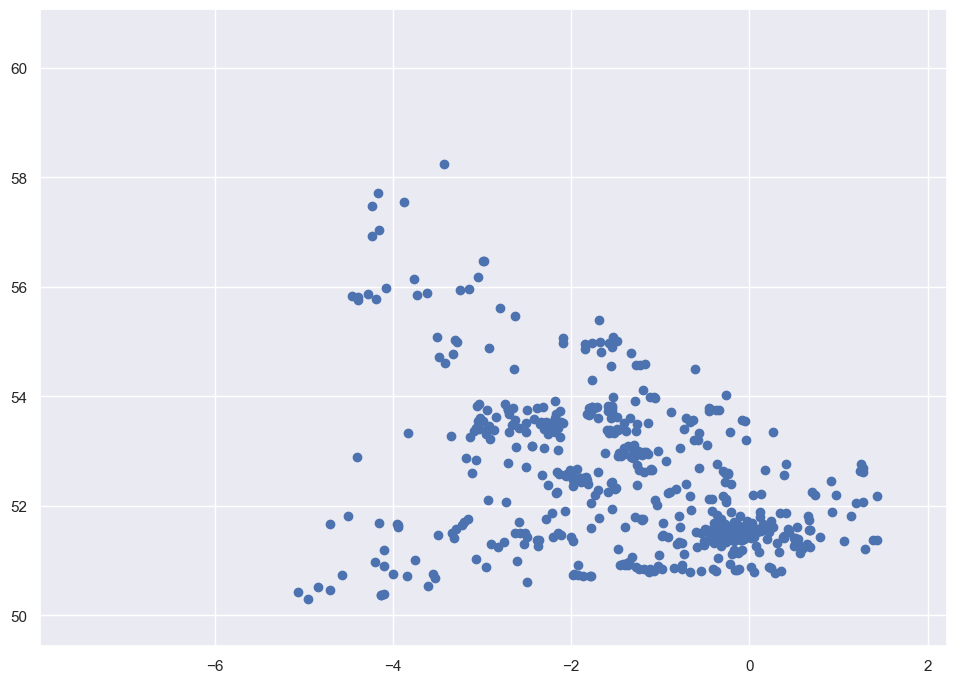

In [483]:
plt.plot(df['longitude'], df['latitude'], 'o', ms=6, markevery=150);


We can now see the resemblance between the figure and the map of the UK, and we also can see the distribution of the accidents in the lower right corner where there are huge population centers and the middle left on the coastal cities of liverpool and the near manchester city.

### Question 2: does the day of the week affect the number of accidents ? and does the time of the day have an effect on the number of accidents ? 

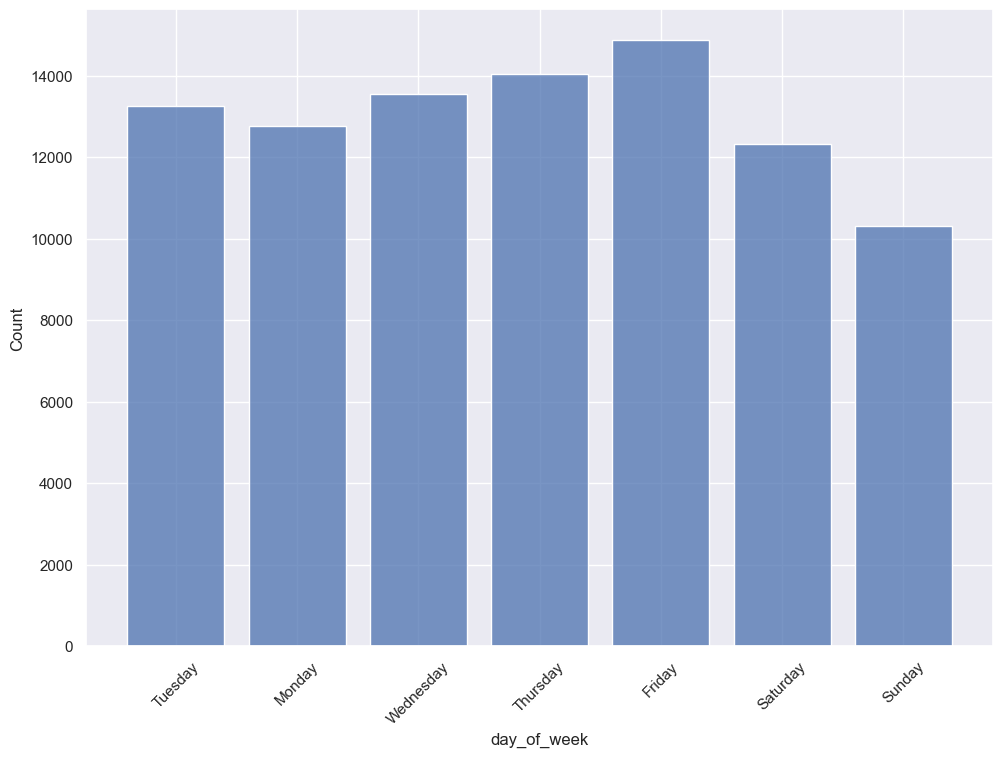

In [484]:
sb.histplot(df['day_of_week'], shrink=.8)
plt.xticks(rotation=45);
# plt.hist(df['day_of_week'])

We can see that the number of the accidents is at a peak on fridays and drops significantly on the weekends. We now will analyze the time of the day and the number of accidents corelated to that time

In [485]:
df['time'].head()

0    09:00
1    13:55
2    01:25
3    01:50
4    02:25
Name: time, dtype: object

In [486]:
def get_hour (x:str) :
    return (x.split(':')[0])

df['time_hour']= df['time'].apply(get_hour)


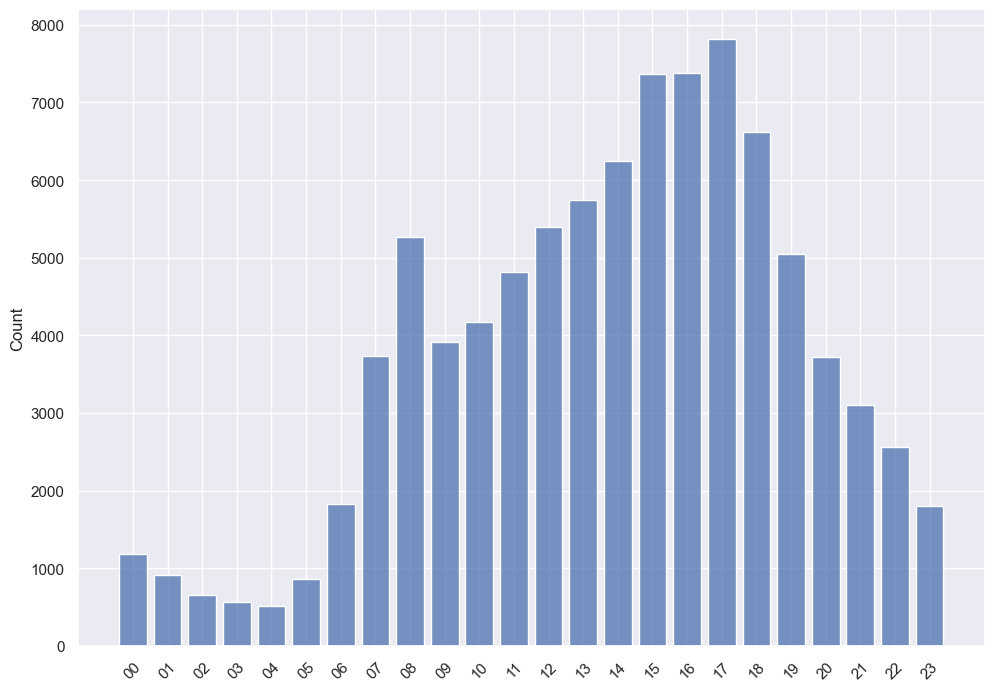

In [487]:
sb.histplot(np.sort(df['time_hour']), shrink=.8,  bins=24)
plt.xticks(rotation=45);

We can notice that accidents happen the most at 6pm and this is due to the fact that at this time it is usually the rush hour 

## We will now delve in the multivariate exploration of the data
### Question 3: We will now explore the relationship between the road type and the severity and the number of causalties in that accident 

In [488]:
df['road_type'].unique()

array(['Single carriageway', 'One way street', 'Dual carriageway',
       'Slip road', 'Roundabout', nan], dtype=object)

In [489]:
df['accident_severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [490]:
df['number_of_casualties'].count()

91199

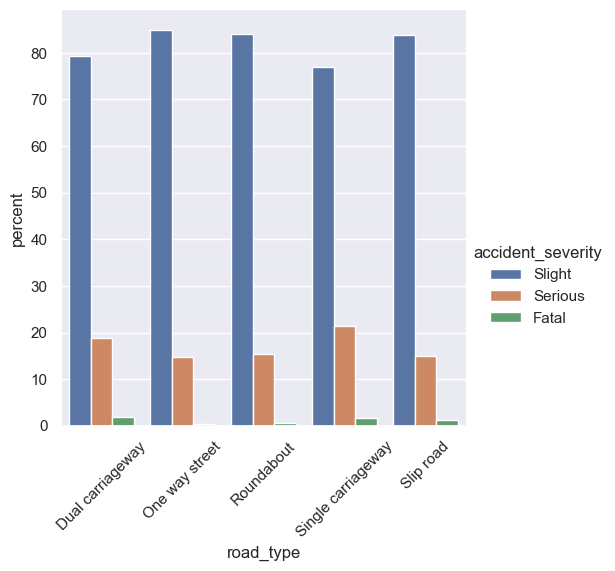

In [491]:
df1 = df.groupby("road_type")["accident_severity"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sb.catplot(data=df1, x="road_type", y="percent", hue="accident_severity", kind="bar")
plt.xticks(rotation=45);


We can see that that the singel carriageway has more serious and fatal accidents compared to other road types.

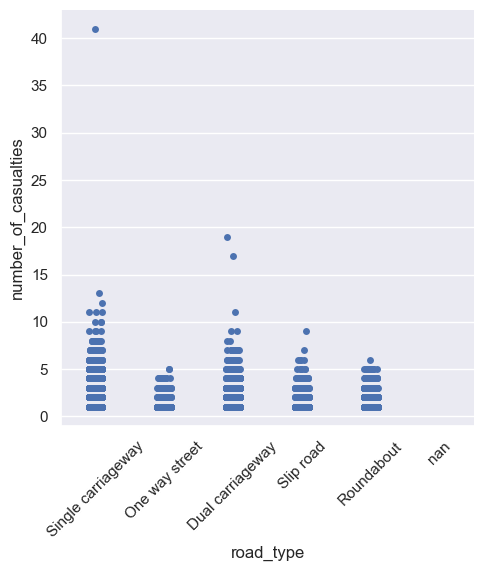

In [492]:
sb.catplot(data=df, x="road_type", y="number_of_casualties")
plt.xticks(rotation=45);


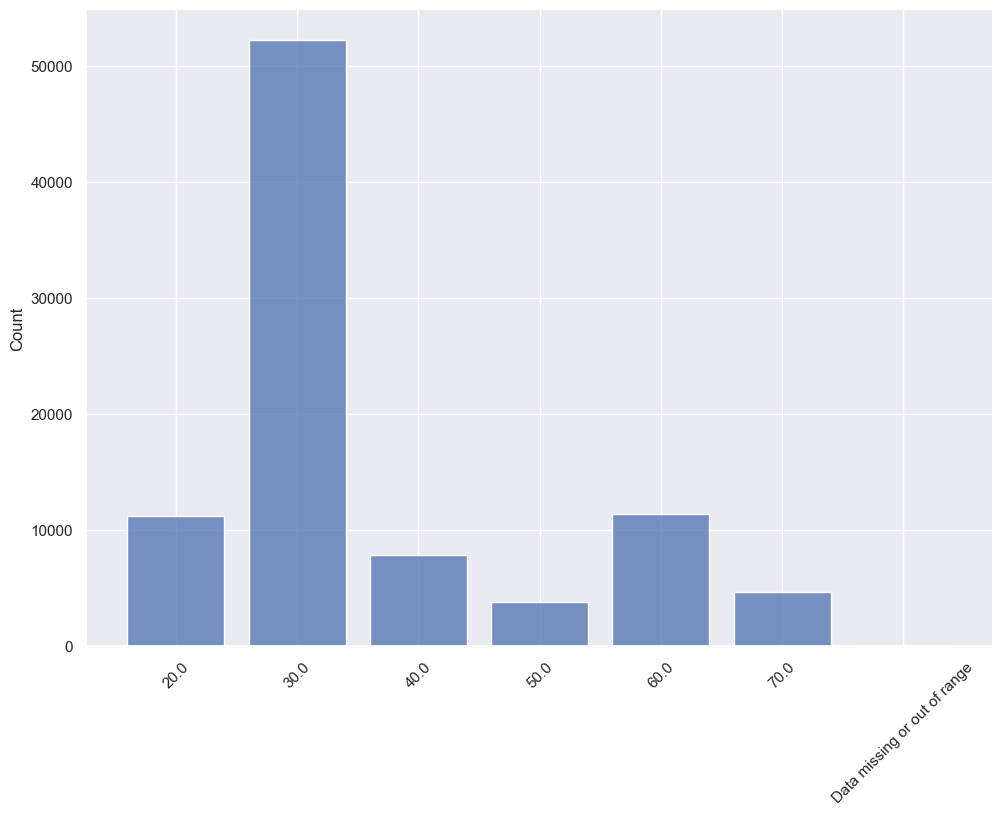

In [493]:
sb.histplot(np.sort(df['speed_limit']), shrink=.8,)
plt.xticks(rotation=45);

In [494]:
df['speed_limit'].value_counts()

30.0                            52260
60.0                            11408
20.0                            11183
40.0                             7867
70.0                             4687
50.0                             3782
Data missing or out of range       12
Name: speed_limit, dtype: int64

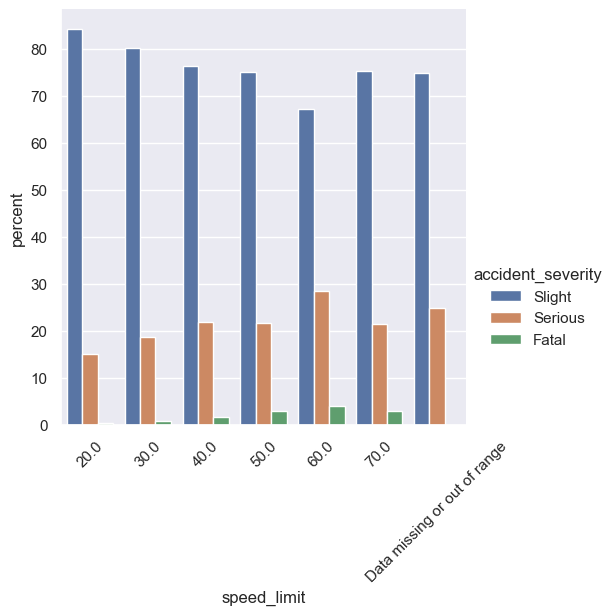

In [495]:
df1 = df.groupby("speed_limit")["accident_severity"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sb.catplot(data=df1, x="speed_limit", y="percent", hue="accident_severity", kind="bar")
plt.xticks(rotation=45);

Finished EDA

# 3 - Cleaning Data

## Observing Missing and duplicate Data

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  object 
 8   accident_severity                            91199 non-null  object 
 9   number_of_vehicles                           91199 non-null  int64  
 10

We will drop the missing location easting ogr and location westing ogr and latitude and longitude 

In [497]:
df['road_type'].value_counts()


Single carriageway    66929
Dual carriageway      13206
Roundabout             5580
One way street         1966
Slip road              1512
Name: road_type, dtype: int64

In [498]:
road_type_nan = df[df["road_type"].isna()]
road_type_not_nan = df[df["road_type"].notna()]


In [499]:
display(road_type_nan.head())

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,time_hour
37,2020010228155,2020,010228155,549043.0,183451.0,0.147310,51.530303,Metropolitan Police,Slight,1,...,Darkness - lighting unknown,Fog or mist,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01000095,06
89,2020010228351,2020,010228351,532797.0,189181.0,-0.084592,51.585847,Metropolitan Police,Slight,2,...,Daylight,Fine no high winds,Wet or damp,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01002067,10
154,2020010228565,2020,010228565,523741.0,185810.0,-0.216421,51.557612,Metropolitan Police,Slight,2,...,Darkness - lighting unknown,Raining no high winds,unknown (self reported),unknown (self reported),unknown (self reported),Urban,No - accident was reported using a self comple...,Non-trunk,E01000141,19
181,2020010228653,2020,010228653,533191.0,166344.0,-0.087514,51.380528,Metropolitan Police,Slight,2,...,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01000976,14
191,2020010228686,2020,010228686,524575.0,176493.0,-0.207688,51.473695,Metropolitan Police,Serious,2,...,Darkness - lighting unknown,Fine no high winds,Dry,Road sign or marking defective or obscured,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01001951,20


In [500]:
road_type_not_nan['did_police_officer_attend_scene_of_accident'].value_counts()

Yes                                                                         62259
No                                                                          19455
No - accident was reported using a self completion  form (self rep only)     7478
Data missing or out of range                                                    1
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [501]:
road_type_nan['did_police_officer_attend_scene_of_accident'].value_counts () 

No - accident was reported using a self completion  form (self rep only)    1640
No                                                                           183
Yes                                                                          183
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [502]:
df['second_road_class'].value_counts()



Not at junction or within 20 metres    37928
Unclassified                           36435
A                                       9566
B                                       3656
C                                       3154
Motorway                                 314
-1                                       110
A(M)                                      36
Name: second_road_class, dtype: int64

In [503]:
second_number_nan = df[df["second_road_number"].isna()]
second_number_not_nan = df[df["second_road_number"].notna()]


In [504]:
second_number_nan['first_road_class'].value_counts()



A               15386
Unclassified    14052
B                4803
Motorway         2058
C                1574
A(M)              172
Name: first_road_class, dtype: int64

In [505]:
second_number_nan.groupby(by=['first_road_class', 'second_road_class'] ).count()['accident_year']

first_road_class  second_road_class                  
A                 -1                                        53
                  A                                          3
                  Not at junction or within 20 metres    15330
A(M)              -1                                         2
                  Not at junction or within 20 metres      170
B                 -1                                         9
                  Not at junction or within 20 metres     4794
C                 -1                                        11
                  Not at junction or within 20 metres     1563
Motorway          Not at junction or within 20 metres     2058
Unclassified      -1                                        35
                  A                                          3
                  B                                          1
                  Not at junction or within 20 metres    14013
Name: accident_year, dtype: int64

In [506]:
second_number_not_nan.groupby(by=['first_road_class', 'second_road_class'] ).count()['second_road_number']


first_road_class  second_road_class
A                 A                     6507
                  A(M)                    16
                  B                     1931
                  C                     1791
                  Motorway               180
                  Unclassified         14793
A(M)              A                       16
                  A(M)                     7
                  B                        7
                  Unclassified             5
B                 A                      600
                  A(M)                     5
                  B                      889
                  C                      391
                  Motorway                11
                  Unclassified          4791
C                 A                      323
                  B                       84
                  C                      753
                  Unclassified          2081
Motorway          A                      161
                  A

In [507]:
df['weather_conditions'].value_counts()

Fine no high winds              70729
Raining no high winds           11583
Other                            2629
Raining + high winds             1665
Fine + high winds                1401
Fog or mist                       510
Snowing no high winds             185
Snowing + high winds               73
Data missing or out of range        1
Name: weather_conditions, dtype: int64

In [508]:


df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [509]:
df['month'] =pd.DatetimeIndex(df['date']).month

In [510]:
weathers_nan = df[df["weather_conditions"].isna()]['month'].value_counts().sort_index()
weathers_not_nan = df[df["weather_conditions"].notna()]['month'].value_counts().sort_index()

In [511]:
def normalize(series_index):
    return (series_index-series_index.min())/(series_index.max()-series_index.min())

## Handling Missing data

In [512]:
df.dropna(subset=["location_easting_osgr","location_northing_osgr" , "longitude" , "latitude"], inplace=True)

In [522]:
df['road_type'].unique()
df['road_type'].value_counts()
road_type_not_nan = df[ (df["road_type"].notna())]
def get_random_road_type (x) :
    if(not isinstance(x, str)):
        return np.random.choice(road_type_not_nan['road_type'])
    return x
df['road_type'] = df['road_type'].apply(get_random_road_type)

In [524]:
def get_mode_weather_conditions (x, mode, month) :
    if(not isinstance(x, str) & x.month== month  ):
        return mode
    return x['weather_conditions']
for i in range(1,12):
    month_mode  = df.query('month == ' +str(i))['weather_conditions'].mode()[0]
    df['new_weather_conditions']=df.apply(lambda row: month_mode if (not isinstance(row['weather_conditions'], str) &row['month']== i ) else row['weather_conditions'], axis=1)

Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds
Fine no high winds


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91185 non-null  object        
 1   accident_year                                91185 non-null  int64         
 2   accident_reference                           91185 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91185 non-null  object        
 8   accident_severity                            91185 non-null  object        


## Filling second road class manuaally

## Findings and conclusions




## Observing outliers

<AxesSubplot: xlabel='number_of_casualties', ylabel='speed_limit'>

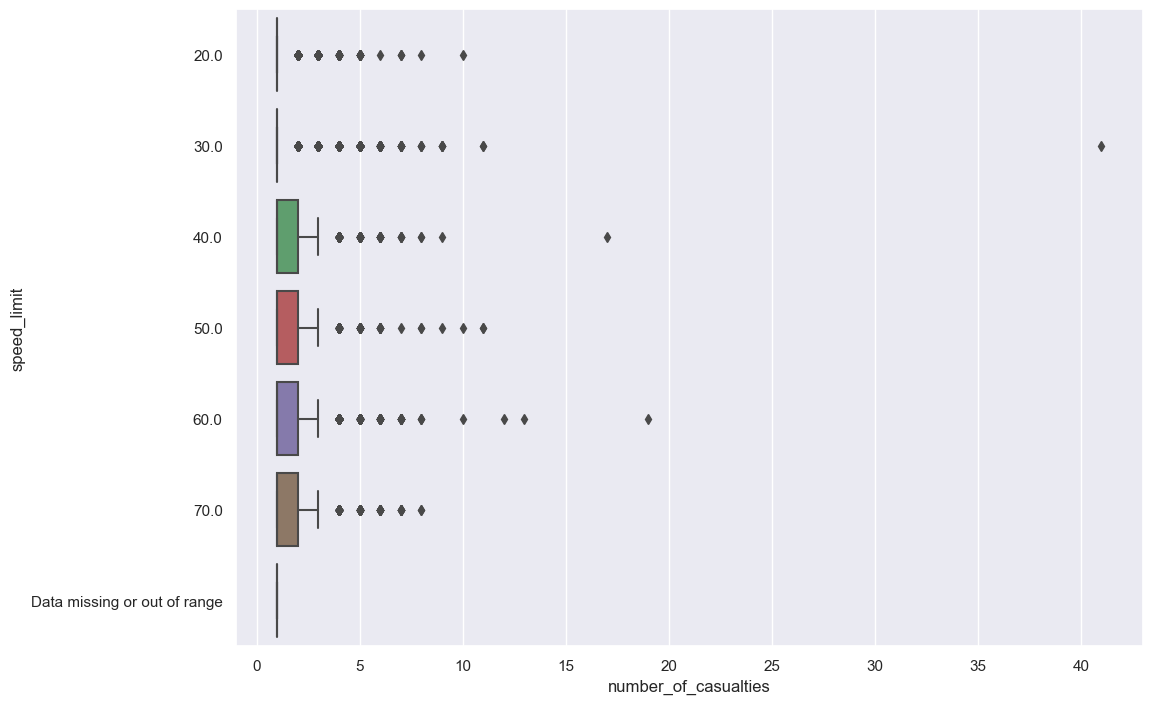

In [537]:
sb.boxplot(x = df['number_of_casualties'], y=df['speed_limit'])


<AxesSubplot: xlabel='number_of_vehicles', ylabel='speed_limit'>

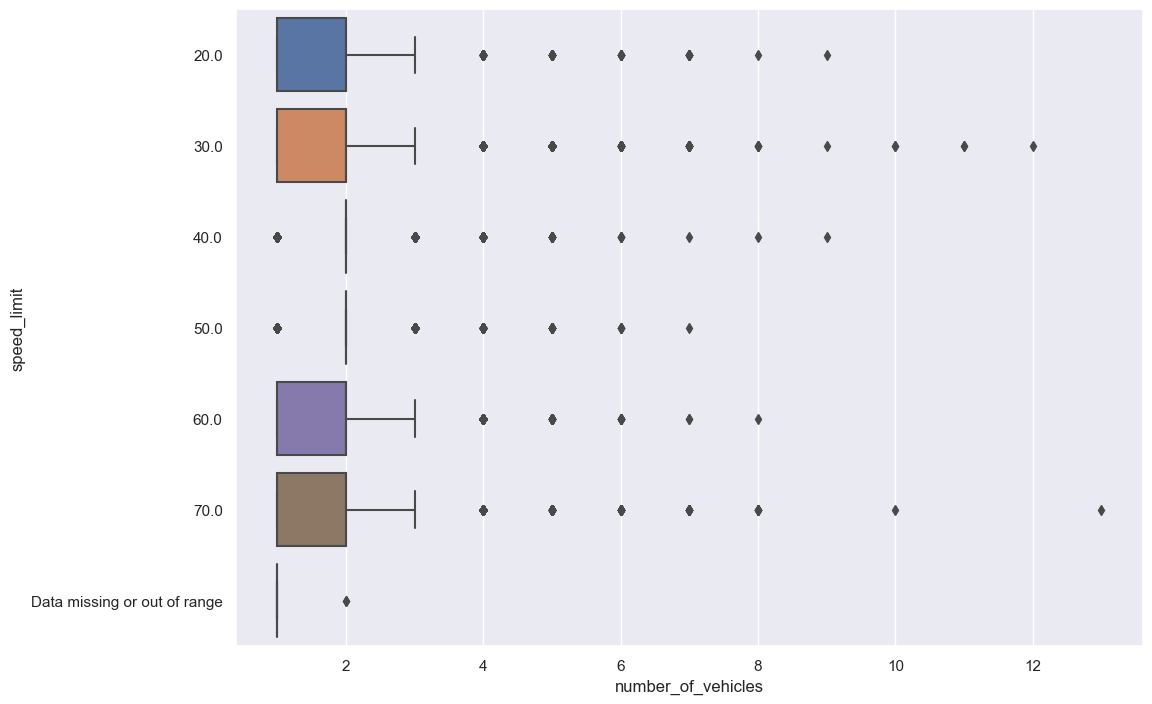

In [538]:
sb.boxplot(x = df['number_of_vehicles'], y=df['speed_limit'])


## Handling outliers

## Findings and conclusions

# 4 - Data transformation

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

In [546]:
dummies = pd.get_dummies(df['urban_or_rural_area', 'accident_severity'])
df = pd.concat([df, dummies], axis=1).reindex(df.index)
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,time_hour,month,new_weather_conditions,week_number,Rural,Urban
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,...,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576,09,2,Fine no high winds,6,0,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,Urban,Yes,Non-trunk,E01003034,13,4,Fine no high winds,18,0,1
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,...,Urban,Yes,Non-trunk,E01004726,01,1,Fine no high winds,1,0,1
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,...,Urban,Yes,Non-trunk,E01003617,01,1,Fine no high winds,1,0,1
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,...,Urban,Yes,Non-trunk,E01004763,02,1,Fine no high winds,1,0,1


## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

In [539]:
df['week_number'] = df['date'].dt.week

C:\Users\Omar\AppData\Local\Temp\ipykernel_15084\1384117895.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_number'] = df['date'].dt.week


In [540]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,time_hour,month,new_weather_conditions,week_number
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,...,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576,09,2,Fine no high winds,6
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,None,None,Urban,Yes,Non-trunk,E01003034,13,4,Fine no high winds,18
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,...,None,None,Urban,Yes,Non-trunk,E01004726,01,1,Fine no high winds,1
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,...,None,None,Urban,Yes,Non-trunk,E01003617,01,1,Fine no high winds,1
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,...,None,None,Urban,Yes,Non-trunk,E01004763,02,1,Fine no high winds,1


## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

In [ ]:
df.to_csv('mydataframe.csv')

## 5- Exporting the dataframe to a csv file or parquet

In [548]:
pip install fastparquet

     ------------------------------------ 615.9/615.9 KB 124.2 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 161.4 kB/s eta 0:00:00
     ------------------------------------ 139.5/139.5 KB 142.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [549]:
df.to_parquet('mydataframe.parquet')